In [23]:
import pandas as pd
df=pd.read_csv('tested.csv')

In [24]:
print(df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [25]:
df=df.drop(columns=['PassengerId','Name','Ticket','Cabin'])

In [26]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [27]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [29]:
X = df.drop('Survived', axis=1)
y = df['Survived']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [30]:
numericals_col=['Pclass','Age','SibSp','Parch']
cat_col=['Sex','Embarked']

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
preprocessed=ColumnTransformer(transformers=[('num',StandardScaler(),numericals_col)
                                            ,('cat',OneHotEncoder(),cat_col)])

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
pip= Pipeline([('prep',preprocessed),('lr',LogisticRegression())])

In [33]:
model=pip.fit(X_train,y_train)
pred=model.predict(X_test)

In [34]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,pred))
print(metrics.classification_report(y_test,pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [36]:
from sklearn.neighbors import KNeighborsClassifier
pip_knn= Pipeline([('prep',preprocessed),('kn',KNeighborsClassifier(n_neighbors=3))])

In [37]:
model=pip_knn.fit(X_train,y_train)
pred=model.predict(X_test)
print(metrics.accuracy_score(y_test,pred))
print(metrics.classification_report(y_test,pred))

0.9880952380952381
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.97      0.99        34

    accuracy                           0.99        84
   macro avg       0.99      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84



In [38]:
from sklearn import svm
from sklearn.svm import SVC
pip_svc= Pipeline([('prep',preprocessed),('svc',SVC())])

In [39]:
model=pip_svc.fit(X_train,y_train)
pred=model.predict(X_test)
print(metrics.accuracy_score(y_test,pred))
print(metrics.classification_report(y_test,pred))

0.9880952380952381
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.97      0.99        34

    accuracy                           0.99        84
   macro avg       0.99      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84



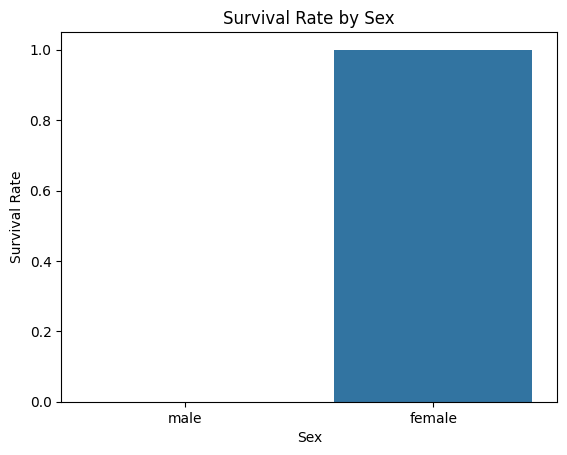

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Barplot of survival rate grouped by gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.show()


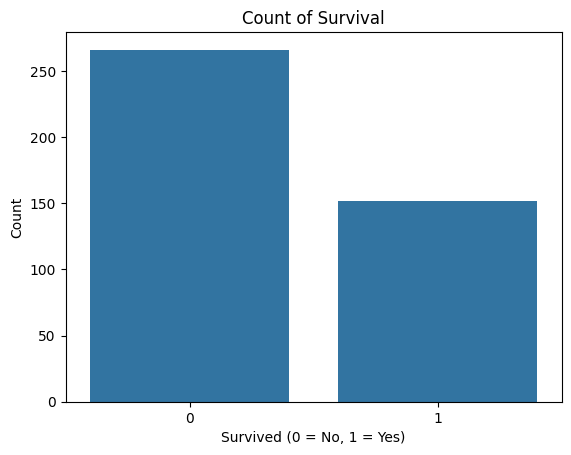

In [44]:
sns.countplot(x='Survived', data=df)
plt.title("Count of Survival")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


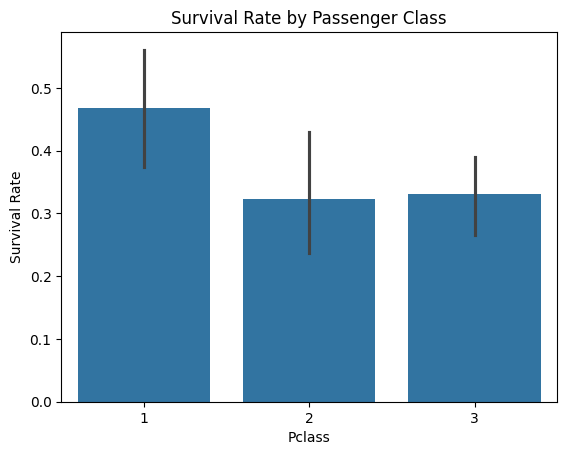

In [45]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.show()


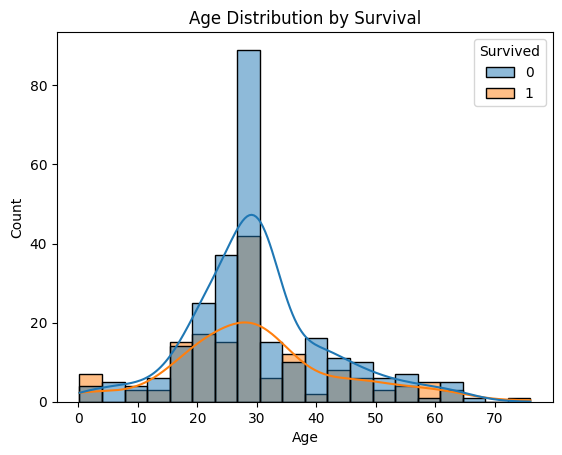

In [46]:
sns.histplot(data=df, x='Age', hue='Survived', bins=20, kde=True)
plt.title("Age Distribution by Survival")
plt.show()


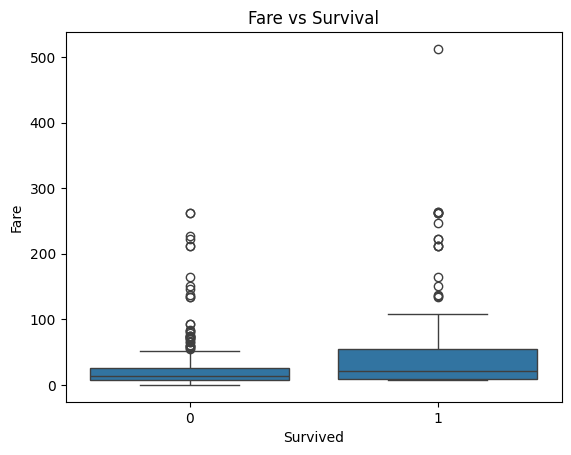

In [47]:
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare vs Survival")
plt.show()


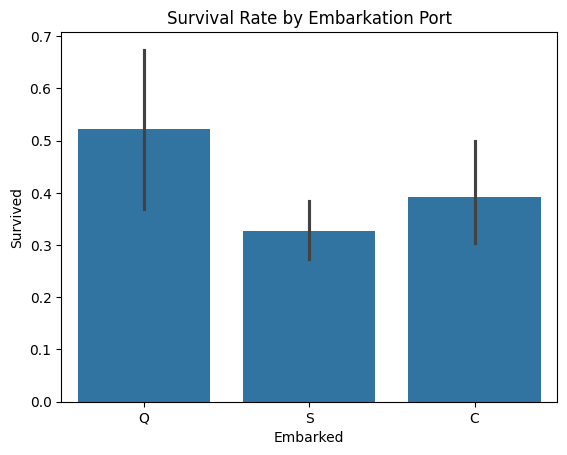

In [48]:
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title("Survival Rate by Embarkation Port")
plt.show()
